## 이벤트 당 뮤온이 약 4-5개 나옴

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm  # ✅ 진행률 표시

sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
total_number = 0
muon_pt = events["Muon_pt"].array()
for i in range(len(muon_pt)):
    if len(muon_pt[i]) == 0:
        print("No muons in event", i)
        continue
    # muon pt가 있는 경우에만 출력
    print(f"Event {i} has {len(muon_pt[i])} muons with pt:", muon_pt[i])
    total_number += len(muon_pt[i])

print(total_number/499, "averge muon number per event")




Event 0 has 5 muons with pt: [551, 103, 47.3, 28.5, 27.7]
Event 1 has 7 muons with pt: [567, 370, 334, 51.9, 28.2, 21.7, 12.4]
Event 2 has 3 muons with pt: [924, 67.1, 15.5]
Event 3 has 10 muons with pt: [1.99e+03, 279, 253, 226, 98, 89.9, 57.3, 22.9, 13.2, 3.7]
Event 4 has 5 muons with pt: [519, 397, 80.2, 79.9, 27]
Event 5 has 4 muons with pt: [724, 391, 29.2, 16.8]
Event 6 has 5 muons with pt: [1.51e+03, 906, 35.6, 27.4, 24.5]
Event 7 has 7 muons with pt: [452, 219, 64.1, 31, 29, 17.3, 16.2]
Event 8 has 4 muons with pt: [557, 147, 18.7, 15.3]
Event 9 has 4 muons with pt: [1.11e+03, 83.4, 47.5, 3.5]
Event 10 has 4 muons with pt: [969, 121, 7.78, 5.04]
Event 11 has 4 muons with pt: [1.06e+03, 121, 29.6, 26.1]
Event 12 has 5 muons with pt: [534, 423, 21.2, 20.8, 4.64]
Event 13 has 3 muons with pt: [834, 258, 7.33]
Event 14 has 5 muons with pt: [545, 423, 13.6, 9.88, 5.85]
Event 15 has 5 muons with pt: [1.88e+03, 995, 162, 92.6, 15.6]
Event 16 has 8 muons with pt: [244, 80.8, 68.4, 66.7

###  이벤트 내에서 가장 큰 pt의 뮤온을 가져오면 될거 같음.-> 확인 해보기

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm  # ✅ 진행률 표시

sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
muon_pt = events["Muon_pt"].array()
lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)  
lhe_muon_pt = lhe_pt[muon_mask]
k=20
print(muon_pt[k])
print(lhe_muon_pt[k])
muon_1_pt = []
muon_2_pt = []
delta_pts = []
lhe_muon1_pt = []
lhe_muon2_pt = []
'''
for i in range(len(muon_pt)):
    if len(muon_pt[i]) > 1:
        muon_1_pt.append(muon_pt[i][0])
        muon_1_pt.append(muon_pt[i][1])
        lhe_muon1_pt.append(lhe_muon_pt[i][0])
        lhe_muon2_pt.append(lhe_muon_pt[i][1])
all_muon_pt = ak.flatten(muon_pt)
lhe_muon_pt = ak.flatten(lhe_muon_pt)
#plt.hist(muon_1_pt, bins=100, range=(0, 3000), alpha=0.5, label='Muon 1 pt')
#plt.hist(muon_2_pt, bins=100, range=(0, 5000), alpha=0.5, label='Muon 2 pt')
#plt.hist(all_muon_pt, bins=100, range=(0, 300), alpha=0.5, label='All Muon pt')
plt.hist(lhe_muon1_pt, bins=100, range=(0, 300), alpha=0.5, label='LHE n mother Muon pt')
plt.hist(lhe_muon2_pt, bins=100, range=(0, 300), alpha=0.5, label='LHE wr mother Muon pt ')
#plt.hist(lhe_muon_pt, bins=100, range=(0, 300), alpha=0.5, label='LHE Muon pt')
plt.xlabel('Muon pT (GeV)')
plt.ylabel('Number of Events')
plt.legend()
print(len(muon_1_pt), len(lhe_muon_pt))


'''

#!/usr/bin/env python
# -*- coding: utf-8 -*-

import uproot
import awkward as ak
import numpy as np
import csv

# --- 1) input ROOT 파일 & tree 열기
sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
events = uproot.open(sample)["Events"]

# --- 2) 전체 배열 한 번에 로드 (lazy-loading 지원)
muon_pt   = events["Muon_pt"].array(library="ak")       # JaggedArray: per-event muon pT 리스트
muon_eta  = events["Muon_eta"].array(library="ak")      # JaggedArray: per-event muon eta 리스트
muon_phi  = events["Muon_phi"].array(library="ak")      # Jag
lhe_pt    = events["LHEPart_pt"].array(library="ak")    # JaggedArray: per-event LHE pT 리스트
lhe_pid   = events["LHEPart_pdgId"].array(library="ak") # JaggedArray: per-event LHE pdgId 리스트

# --- 3) 출력 CSV 파일 준비
out_csv = "muon_vs_lhe_pt_0_499.csv"
with open(out_csv, mode="w", newline='') as f:
    writer = csv.writer(f)
    # 헤더
    writer.writerow(["muon_pt (GeV)", "lhe_muon_pt (GeV)"])
    
    # --- 4) 이벤트 루프 (0 <= k < 500)
    for k in range(500):
        # 4-a) recon muon pT 리스트
        reco_pts = muon_pt[k].to_list()  # e.g. [12.3, 45.1, ...]
        
        # 4-b) LHE 단계에서 pdgId==±13인 입자만 필터
        mask     = (lhe_pid[k] == 13) | (lhe_pid[k] == -13)
        gen_pts  = lhe_pt[k][mask].to_list()  # e.g. [11.8, 44.7, ...]
        # 4-c) 리스트 → 세미콜론 구분 문자열 변환
        reco_str = ";".join(f"{x:.3f}" for x in reco_pts)
        gen_str  = ";".join(f"{x:.3f}" for x in gen_pts)
        
        # 4-d) CSV에 한 줄 기록
        writer.writerow([reco_str, gen_str])

print(f"저장 완료: {out_csv}")

[301, 282, 193, 99.2, 75.8, 48.4, 23.5, 22, 20.4, 15.9]
[182, 297]


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

### 그림으로 확인하기

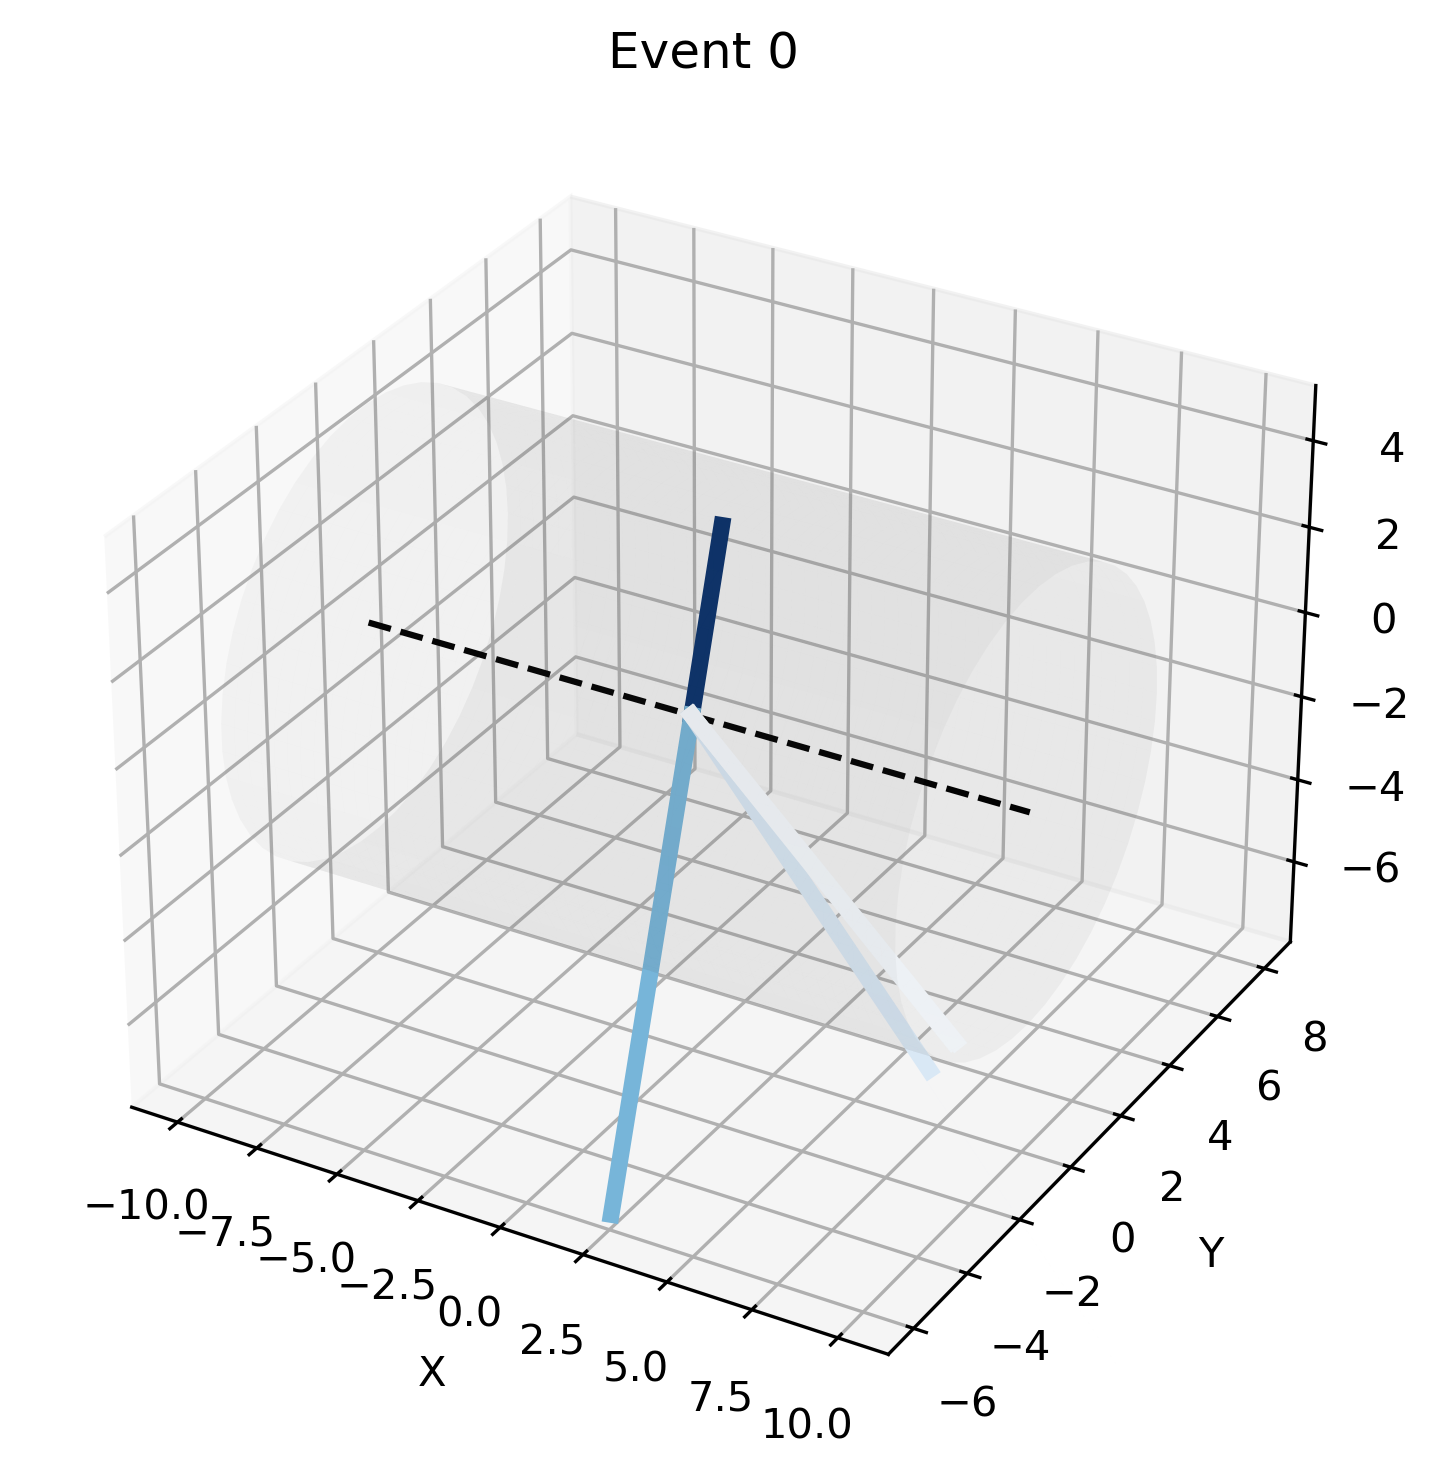

In [28]:
def plot_multiple_trajectories(
    etas_list, phis_list, pts_list ,
    R=5.0, t_max=10.0, num_t=100,
    cmap='Blues', cols=3, figsize=(10, 5), dpi=300
):
    """
    Plot multiple particle events as 3D sideways cylinder trajectories.

    - etas_list, phis_list, pts_list, pdgids_list: list of per-event arrays
    - cols: number of columns in subplot grid
    """
    import math

    num_events = len(etas_list)
    rows = math.ceil(num_events / cols)

    fig = plt.figure(figsize=(figsize[0]*cols, figsize[1]*rows), dpi=dpi)
    
    for i in range(num_events):
        ax = fig.add_subplot(rows, cols, i+1, projection='3d')
        
        etas = np.asarray(etas_list[i])
        phis = np.asarray(phis_list[i])
        pts  = np.asarray(pts_list[i])
        #pdgids = np.asarray(pdgids_list[i], dtype=str)
        thetas = 2 * np.arctan(np.exp(-etas))

        norm = (pts - pts.min()) / (pts.max() - pts.min() + 1e-8)
        colormap = plt.get_cmap(cmap)
        
        # Cylinder mesh
        x_vals = np.linspace(-t_max, t_max, 50)
        phi_grid, x_grid = np.meshgrid(np.linspace(0, 2*np.pi, 50), x_vals)
        y_grid = R * np.cos(phi_grid)
        z_grid = R * np.sin(phi_grid)

        t = np.linspace(0, t_max, num_t)

        ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.05, color='gray')
        ax.plot([-t_max, 0], [0,0], [0,0], '--', color='black')
        ax.plot([0, t_max], [0,0], [0,0], '--', color='black')

        for theta, phi, val, frac in zip(thetas, phis, pts, norm):
            x = t * np.cos(theta)
            y = t * np.sin(theta) * np.cos(phi)
            z = t * np.sin(theta) * np.sin(phi)
            ax.plot(x, y, z, color=colormap(frac), linewidth=4)
            #ax.text(x[-1], y[-1], z[-1], label, color='black', fontsize=8)

        ax.set_title(f'Event {i}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()

kk =17
plot_multiple_trajectories( muon_eta[k:k+1], muon_phi[k:k+1], muon_pt[k:k+1])


### pt matching


'\n    #delta_pt_letpons.append(delta_pt)\n    \n    if len(muon_pt[i]) > 1:\n        # 모든 뮤온 쌍에 대해 invariant mass 계산\n        for idx1, idx2 in combinations(range(len(muon_pt[i])), 2):\n            pt1, eta1, phi1, mass1 = muon_pt[i][idx1], muon_eta[i][idx1], muon_phi[i][idx1], muon_mass[i][idx1]\n            pt2, eta2, phi2, mass2 = muon_pt[i][idx2], muon_eta[i][idx2], muon_phi[i][idx2], muon_mass[i][idx2]\n            mu1 = vector.obj(pt=pt1, eta=eta1, phi=phi1, mass=mass1)\n            mu2 = vector.obj(pt=pt2, eta=eta2, phi=phi2, mass=mass2)\n            inv_mass = (mu1 + mu2).mass\n            all_mlls.append(inv_mass)\n            if pt1 > 50 and pt2 > 50:\n                all_pt_50_cut_muon_mlls.append(inv_mass)\n            if pt1 > 100 and pt2 > 100:\n                all_pt_100_cut_muon_mlls.append(inv_mass)\n#plt.hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label=\'mll distribution\')\n#plt.hist(all_mlls, bins=100, range=(0, 3000), alpha=0.5, label=\'All mll distribution\

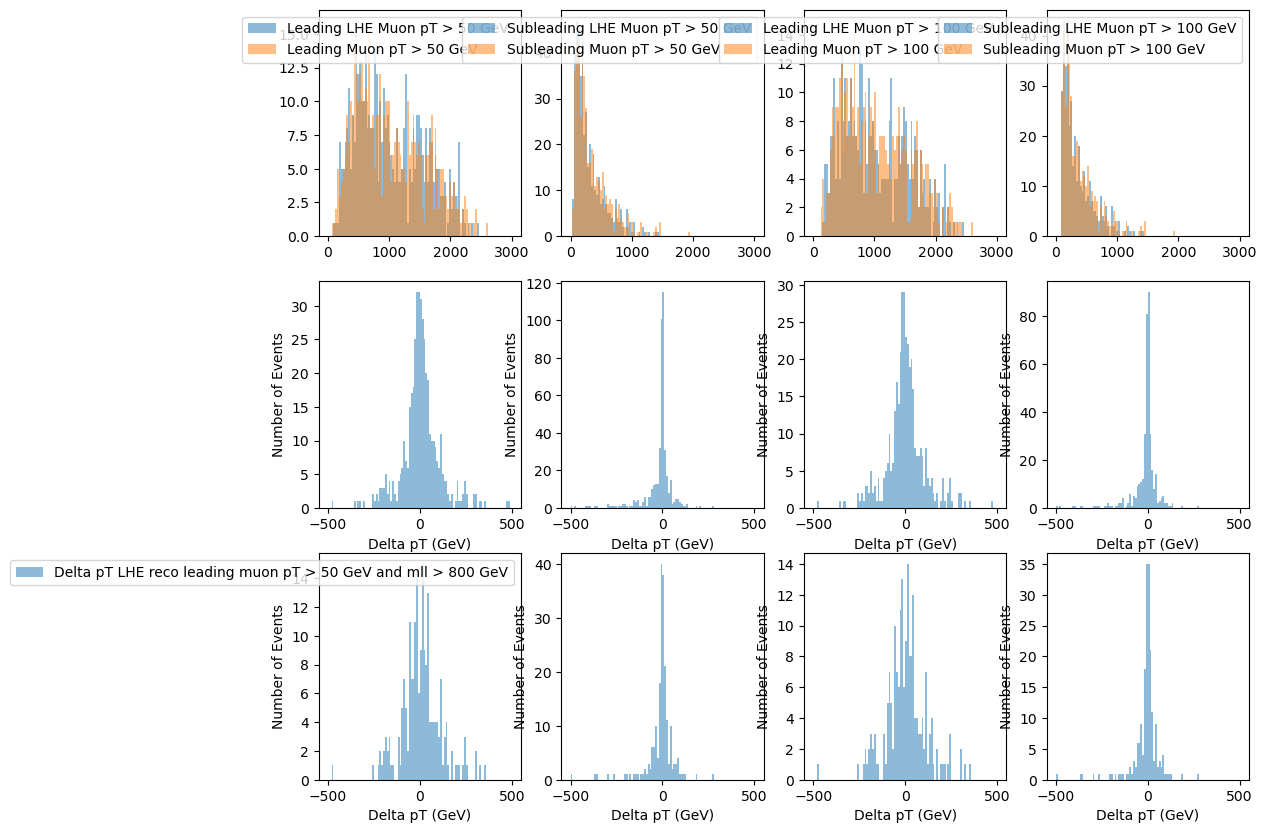

In [53]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from itertools import combinations
from tqdm import tqdm  # ✅ 진행률 표시

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
muon_pt = events["Muon_pt"].array()
muon_eta = events["Muon_eta"].array()
muon_phi = events["Muon_phi"].array()
muon_mass = events["Muon_mass"].array()


lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()

muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)  
lhe_muon_pt = lhe_pt[muon_mask]
lhe_muon_eta = lhe_eta[muon_mask]
lhe_muon_phi = lhe_phi[muon_mask]
lhe_muon_mass = lhe_mass[muon_mask]

mlls = []
all_mlls = []
n_mother_muon_pts = []
wr_mother_muon_pts = []
delta_pt_letpons = []

pt_50_cut_muon_mlls = []
pt_100_cut_muon_mlls = []

all_pt_50_cut_muon_mlls = []
all_pt_100_cut_muon_mlls = []

leading_muon_50cut_pt = []
subleading_muon_50cut_pt = []
leading_muon_100cut_pt = []
subleading_muon_100cut_pt = []

leading_lhe_muon_50cut_pt = []
subleading_lhe_muon_50cut_pt = []
leading_lhe_muon_100cut_pt = []
subleading_lhe_muon_100cut_pt = []

delta_pt_lhe_reco_50_leadings = []
delta_pt_lhe_reco_50_subleadings = []
delta_pt_lhe_reco_100_leadings = []
delta_pt_lhe_reco_100_subleadings = []

delta_pt_lhe_reco_50_800_leading = []
delta_pt_lhe_reco_50_800_subleading = []
delta_pt_lhe_reco_100_800_leading = []
delta_pt_lhe_reco_100_800_subleading = []

for i in range(len(lhe_muon_pt)):
    n_mother_muon_pt = lhe_muon_pt[i][0]
    n_mother_muon_eta = lhe_muon_eta[i][0]
    n_mother_muon_phi = lhe_muon_phi[i][0]
    n_mother_muon_mass = lhe_muon_mass[i][0]

    wr_mother_pt = lhe_muon_pt[i][1]
    wr_mother_eta = lhe_muon_eta[i][1]
    wr_mother_phi = lhe_muon_phi[i][1]
    wr_mother_mass = lhe_muon_mass[i][1]

    n_mother_muons = vector.obj(pt=n_mother_muon_pt, eta=n_mother_muon_eta, phi=n_mother_muon_phi, mass=n_mother_muon_mass)
    wr_mother_muons = vector.obj(pt=wr_mother_pt, eta=wr_mother_eta, phi=wr_mother_phi, mass=wr_mother_mass)
    mll = (n_mother_muons + wr_mother_muons).mass
    delta_pt = n_mother_muon_pt - wr_mother_pt
    n_mother_muon_pts.append(n_mother_muon_pt)
    wr_mother_muon_pts.append(wr_mother_pt)
    mlls.append(mll)

    muon_pt_cut_50 = (muon_pt[i]>50)
    muon_pt_cut_100 = (muon_pt[i]>100)

    up_50_muon_pt = muon_pt[i][muon_pt_cut_50]
    up_100_muon_pt = muon_pt[i][muon_pt_cut_100]

    if len(up_50_muon_pt) > 1:
        leading_muon_50cut_pt.append(up_50_muon_pt[0])
        subleading_muon_50cut_pt.append(up_50_muon_pt[1])
        ## pt cut apply 50
        if n_mother_muon_pt > 50 and wr_mother_pt > 50:
            pt_50_cut_muon_mlls.append(mll)
            pts = [n_mother_muon_pt, wr_mother_pt]
            etas = [n_mother_muon_eta, wr_mother_eta]
            phis = [n_mother_muon_phi, wr_mother_phi]
            masses = [n_mother_muon_mass, wr_mother_mass]
            idxmin = np.argmin(pts)
            idxmax = np.argmax(pts)
            leading = pts[idxmax]
            subleading = pts[idxmin]
            leading_lhe_muon_50cut_pt.append(leading)
            subleading_lhe_muon_50cut_pt.append(subleading)

            delta_pt_lhe_reco_50_leading = leading - up_50_muon_pt[0]
            delta_pt_lhe_reco_50_subleading = subleading - up_50_muon_pt[1]
            delta_pt_lhe_reco_50_leadings.append(delta_pt_lhe_reco_50_leading)
            delta_pt_lhe_reco_50_subleadings.append(delta_pt_lhe_reco_50_subleading)

            ## mll cut
            leading_lhemuons_50 = vector.obj(pt=leading, eta=etas[idxmax], phi=phis[idxmax], mass=masses[idxmax])
            leading_muons_50 = vector.obj(pt=up_50_muon_pt[0], eta=muon_eta[i][0], phi=muon_phi[i][0], mass=muon_mass[i][0])
            subleading_lhemuons_50 = vector.obj(pt=subleading, eta=etas[idxmin], phi=phis[idxmin], mass=masses[idxmin])
            subleading_muons_50 = vector.obj(pt=up_50_muon_pt[1], eta=muon_eta[i][1], phi=muon_phi[i][1], mass=muon_mass[i][1])

            mll_lhemuons_50 = (leading_lhemuons_50 + subleading_lhemuons_50).mass
            mll_muons_50 = (leading_muons_50 + subleading_muons_50).mass

            if mll_lhemuons_50 > 800 and mll_muons_50 > 800:
                delta_pt_lhe_reco_50_800_leading.append(delta_pt_lhe_reco_50_leading)
                delta_pt_lhe_reco_50_800_subleading.append(delta_pt_lhe_reco_50_subleading)
                
            
        
    if len(up_100_muon_pt) > 1:
        leading_muon_100cut_pt.append(up_100_muon_pt[0])
        subleading_muon_100cut_pt.append(up_100_muon_pt[1])
        if n_mother_muon_pt > 100 and wr_mother_pt > 100:
            pt_100_cut_muon_mlls.append(mll)
            pts = [n_mother_muon_pt, wr_mother_pt]
            etas = [n_mother_muon_eta, wr_mother_eta]
            phis = [n_mother_muon_phi, wr_mother_phi]
            masses = [n_mother_muon_mass, wr_mother_mass]
            idxmin = np.argmin(pts)
            idxmax = np.argmax(pts)
            leading = pts[idxmax]
            subleading = pts[idxmin]
            leading_lhe_muon_100cut_pt.append(leading)
            subleading_lhe_muon_100cut_pt.append(subleading)

            delta_pt_lhe_reco_100_leading = leading - up_100_muon_pt[0]
            delta_pt_lhe_reco_100_subleading = subleading - up_100_muon_pt[1]
            delta_pt_lhe_reco_100_leadings.append(delta_pt_lhe_reco_100_leading)
            delta_pt_lhe_reco_100_subleadings.append(delta_pt_lhe_reco_100_subleading)

            ## mll cut
            leading_lhemuons_100 = vector.obj(pt=leading, eta=lhe_muon_eta[i][idxmax], phi=lhe_muon_phi[i][idxmax], mass=lhe_muon_mass[i][idxmax])
            leading_muons_100 = vector.obj(pt=up_100_muon_pt[0], eta=muon_eta[i][0], phi=muon_phi[i][0], mass=muon_mass[i][0])
            subleading_lhemuons_100 = vector.obj(pt=subleading, eta=lhe_muon_eta[i][idxmin], phi=lhe_muon_phi[i][idxmin], mass=lhe_muon_mass[i][idxmin])
            subleading_muons_100 = vector.obj(pt=up_100_muon_pt[1], eta=muon_eta[i][1], phi=muon_phi[i][1], mass=muon_mass[i][1])

            mll_lhemuons_100 = (leading_lhemuons_100 + subleading_lhemuons_100).mass
            mll_muons_100 = (leading_muons_100 + subleading_muons_100).mass
            if mll_lhemuons_100 > 800 and mll_muons_100 > 800:
                delta_pt_lhe_reco_100_800_leading.append(delta_pt_lhe_reco_100_leading)
                delta_pt_lhe_reco_100_800_subleading.append(delta_pt_lhe_reco_100_subleading)

            
    


    
        


    

fig , axes = plt.subplots(3, 4, figsize=(12, 10))
axes[0, 0].hist(leading_lhe_muon_50cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Leading LHE Muon pT > 50 GeV')
axes[0 ,0].hist(leading_muon_50cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Leading Muon pT > 50 GeV')
axes[0, 0].legend()
axes[0,1].hist(subleading_lhe_muon_50cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Subleading LHE Muon pT > 50 GeV')
axes[0,1].hist(subleading_muon_50cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Subleading Muon pT > 50 GeV')
axes[0, 1].legend()
axes[0, 2].hist(leading_lhe_muon_100cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Leading LHE Muon pT > 100 GeV')
axes[0, 2].hist(leading_muon_100cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Leading Muon pT > 100 GeV')
axes[0, 2].legend()
axes[0, 3].hist(subleading_lhe_muon_100cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Subleading LHE Muon pT > 100 GeV')
axes[0, 3].hist(subleading_muon_100cut_pt, bins=100, range=(0, 3000), alpha=0.5, label='Subleading Muon pT > 100 GeV')
axes[0, 3].legend()
axes[1, 0].hist(delta_pt_lhe_reco_50_leadings, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco leading muon pT > 50 GeV')
axes[1, 1].hist(delta_pt_lhe_reco_50_subleadings, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco subleading muon pT > 50 GeV')
axes[1, 2].hist(delta_pt_lhe_reco_100_leadings, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco leading muon pT > 100 GeV')
axes[1, 3].hist(delta_pt_lhe_reco_100_subleadings, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco subleading muon pT > 100 GeV')
axes[1, 0].set_xlabel('Delta pT (GeV)')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 1].set_xlabel('Delta pT (GeV)')
axes[1, 1].set_ylabel('Number of Events')
axes[1, 2].set_xlabel('Delta pT (GeV)')
axes[1, 2].set_ylabel('Number of Events')
axes[1, 3].set_xlabel('Delta pT (GeV)')
axes[1, 3].set_ylabel('Number of Events')
axes[2, 0].hist(delta_pt_lhe_reco_50_800_leading, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco leading muon pT > 50 GeV and mll > 800 GeV')
axes[2, 1].hist(delta_pt_lhe_reco_50_800_subleading, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco subleading muon pT > 50 GeV and mll > 800 GeV')
axes[2, 2].hist(delta_pt_lhe_reco_100_800_leading, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco leading muon pT > 100 GeV and mll > 800 GeV')
axes[2, 3].hist(delta_pt_lhe_reco_100_800_subleading, bins=100, range=(-500, 500), alpha=0.5, label='Delta pT LHE reco subleading muon pT > 100 GeV and mll > 800 GeV')
axes[2, 0].legend()
#axes[2, 1].legend()
#axes[2, 2].legend()
#axes[2, 3].legend()
axes[2, 0].set_xlabel('Delta pT (GeV)')
axes[2, 0].set_ylabel('Number of Events')
axes[2, 1].set_xlabel('Delta pT (GeV)')
axes[2, 1].set_ylabel('Number of Events')
axes[2, 2].set_xlabel('Delta pT (GeV)')
axes[2, 2].set_ylabel('Number of Events')
axes[2, 3].set_xlabel('Delta pT (GeV)')
axes[2, 3].set_ylabel('Number of Events')








'''
    #delta_pt_letpons.append(delta_pt)
    
    if len(muon_pt[i]) > 1:
        # 모든 뮤온 쌍에 대해 invariant mass 계산
        for idx1, idx2 in combinations(range(len(muon_pt[i])), 2):
            pt1, eta1, phi1, mass1 = muon_pt[i][idx1], muon_eta[i][idx1], muon_phi[i][idx1], muon_mass[i][idx1]
            pt2, eta2, phi2, mass2 = muon_pt[i][idx2], muon_eta[i][idx2], muon_phi[i][idx2], muon_mass[i][idx2]
            mu1 = vector.obj(pt=pt1, eta=eta1, phi=phi1, mass=mass1)
            mu2 = vector.obj(pt=pt2, eta=eta2, phi=phi2, mass=mass2)
            inv_mass = (mu1 + mu2).mass
            all_mlls.append(inv_mass)
            if pt1 > 50 and pt2 > 50:
                all_pt_50_cut_muon_mlls.append(inv_mass)
            if pt1 > 100 and pt2 > 100:
                all_pt_100_cut_muon_mlls.append(inv_mass)
#plt.hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution')
#plt.hist(all_mlls, bins=100, range=(0, 3000), alpha=0.5, label='All mll distribution')
#plt.hist(n_mother_muon_pts, bins=100, range=(0, 5000), alpha=0.5, label='N mother muon pt')
#plt.hist(wr_mother_muon_pts, bins=100, range=(0, 5000), alpha=0.5, label='WR mother muon pt')
#plt.hist(delta_pt_letpons, bins=100, range=(-5000, 5000), alpha=0.5, label='Delta pT of leptons')

fig , axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution')
axes[0,0].hist(all_mlls, bins=100, range=(0, 3000), alpha=0.5, label='All mll distribution')
axes[0, 0].set_xlabel('Invariant Mass (GeV)')
axes[0, 0].set_ylabel('Number of Events')
axes[0, 0].legend()
axes[1, 0].hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution')
axes[1,0].hist(pt_50_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution with pT > 50 GeV')
axes[1,0].hist(all_pt_50_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='All mll distribution with pT > 50 GeV')
axes[1, 0].set_xlabel('Invariant Mass (GeV)')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 0].legend()
axes[1, 1].hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution')
axes[1,1].hist(pt_100_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution with pT > 100 GeV')
axes[1,1].hist(all_pt_100_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='All mll distribution with pT > 100 GeV')
axes[1,1].set_xlabel('Invariant Mass (GeV)')
axes[1,1].set_ylabel('Number of Events')
axes[1,1].legend()

plt.legend()
plt.yscale('log')
print(mlls)
mlls = np.array(mlls)
mllcut = mlls > 800
cutedmlls = mlls[mllcut]
print("Number of events with mll > 1000 GeV:", len(cutedmlls))
'''










### m(ll)

[np.float32(353.40192), np.float32(610.1954), np.float32(548.75684), np.float32(1181.6624), np.float32(916.95197), np.float32(1143.7539), np.float32(2138.774), np.float32(667.17126), np.float32(564.4203), np.float32(340.02133), np.float32(599.02795), np.float32(1170.8119), np.float32(574.5348), np.float32(932.01263), np.float32(900.4875), np.float32(1733.4884), np.float32(222.41898), np.float32(473.1438), np.float32(650.84174), np.float32(2323.2593), np.float32(727.0978), np.float32(494.4306), np.float32(282.79056), np.float32(439.1378), np.float32(1665.0518), np.float32(336.17108), np.float32(530.2067), np.float32(405.13208), np.float32(373.32617), np.float32(642.9273), np.float32(699.5162), np.float32(1456.7306), np.float32(2146.4604), np.float32(531.3759), np.float32(405.96198), np.float32(377.21014), np.float32(775.03784), np.float32(377.0272), np.float32(590.3609), np.float32(1038.9814), np.float32(1490.9052), np.float32(2909.0356), np.float32(535.1888), np.float32(473.84744), np.

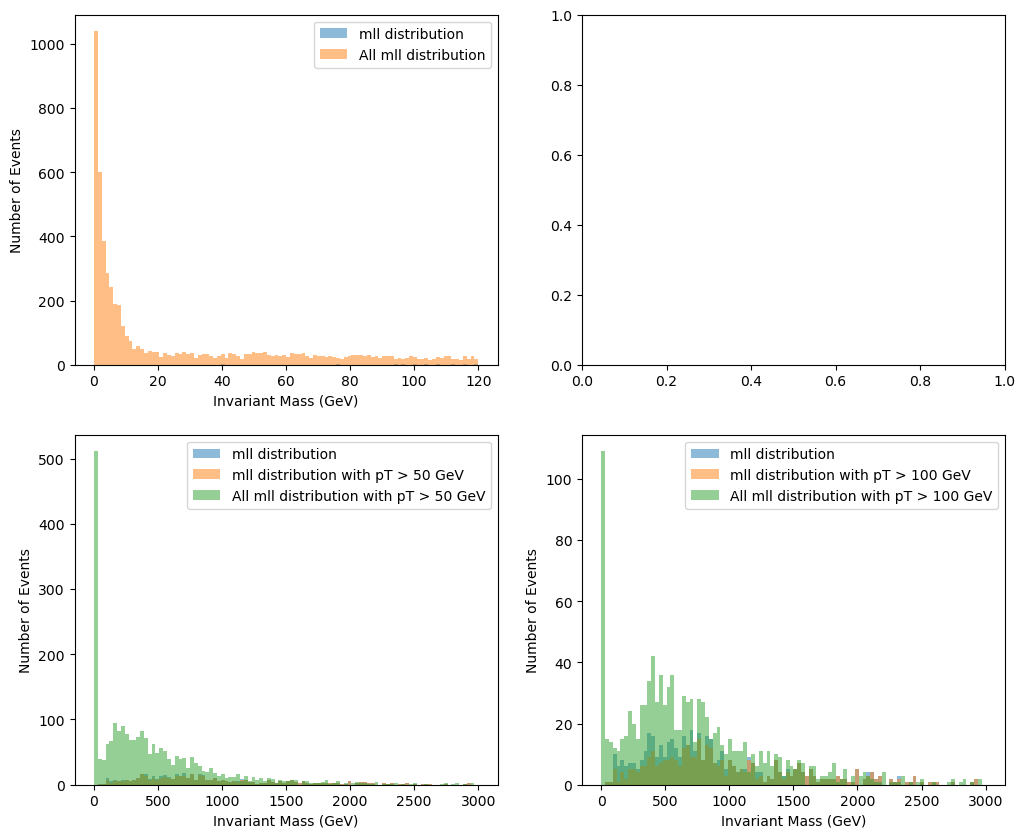

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from itertools import combinations
from tqdm import tqdm  # ✅ 진행률 표시

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
muon_pt = events["Muon_pt"].array()
muon_eta = events["Muon_eta"].array()
muon_phi = events["Muon_phi"].array()
muon_mass = events["Muon_mass"].array()


lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()

muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)  
lhe_muon_pt = lhe_pt[muon_mask]
lhe_muon_eta = lhe_eta[muon_mask]
lhe_muon_phi = lhe_phi[muon_mask]
lhe_muon_mass = lhe_mass[muon_mask]

mlls = []
all_mlls = []
n_mother_muon_pts = []
wr_mother_muon_pts = []
delta_pt_letpons = []

pt_50_cut_muon_mlls = []
pt_100_cut_muon_mlls = []

all_pt_50_cut_muon_mlls = []
all_pt_100_cut_muon_mlls = []

leading_muon_50cut_pt = []
subleading_muon_50cut_pt = []
leading_muon_100cut_pt = []
subleading_muon_100cut_pt = []

leading_lhe_muon_50cut_pt = []
subleading_lhe_muon_50cut_pt = []
leading_lhe_muon_100cut_pt = []
subleading_lhe_muon_100cut_pt = []

delta_pt_lhe_reco_50_leadings = []
delta_pt_lhe_reco_50_subleadings = []
delta_pt_lhe_reco_100_leadings = []
delta_pt_lhe_reco_100_subleadings = []

delta_pt_lhe_reco_50_800_leading = []
delta_pt_lhe_reco_50_800_subleading = []
delta_pt_lhe_reco_100_800_leading = []
delta_pt_lhe_reco_100_800_subleading = []

for i in range(len(lhe_muon_pt)):
    n_mother_muon_pt = lhe_muon_pt[i][0]
    n_mother_muon_eta = lhe_muon_eta[i][0]
    n_mother_muon_phi = lhe_muon_phi[i][0]
    n_mother_muon_mass = lhe_muon_mass[i][0]

    wr_mother_pt = lhe_muon_pt[i][1]
    wr_mother_eta = lhe_muon_eta[i][1]
    wr_mother_phi = lhe_muon_phi[i][1]
    wr_mother_mass = lhe_muon_mass[i][1]

    n_mother_muons = vector.obj(pt=n_mother_muon_pt, eta=n_mother_muon_eta, phi=n_mother_muon_phi, mass=n_mother_muon_mass)
    wr_mother_muons = vector.obj(pt=wr_mother_pt, eta=wr_mother_eta, phi=wr_mother_phi, mass=wr_mother_mass)
    mll = (n_mother_muons + wr_mother_muons).mass
    delta_pt = n_mother_muon_pt - wr_mother_pt
    n_mother_muon_pts.append(n_mother_muon_pt)
    wr_mother_muon_pts.append(wr_mother_pt)
    mlls.append(mll)

    muon_pt_cut_50 = (muon_pt[i]>50)
    muon_pt_cut_100 = (muon_pt[i]>100)

    up_50_muon_pt = muon_pt[i][muon_pt_cut_50]
    up_100_muon_pt = muon_pt[i][muon_pt_cut_100]

    if len(up_50_muon_pt) > 1:
        leading_muon_50cut_pt.append(up_50_muon_pt[0])
        subleading_muon_50cut_pt.append(up_50_muon_pt[1])
        ## pt cut apply 50
        if n_mother_muon_pt > 50 and wr_mother_pt > 50:
            pt_50_cut_muon_mlls.append(mll)
            pts = [n_mother_muon_pt, wr_mother_pt]
            etas = [n_mother_muon_eta, wr_mother_eta]
            phis = [n_mother_muon_phi, wr_mother_phi]
            masses = [n_mother_muon_mass, wr_mother_mass]
            idxmin = np.argmin(pts)
            idxmax = np.argmax(pts)
            leading = pts[idxmax]
            subleading = pts[idxmin]
            leading_lhe_muon_50cut_pt.append(leading)
            subleading_lhe_muon_50cut_pt.append(subleading)

            delta_pt_lhe_reco_50_leading = leading - up_50_muon_pt[0]
            delta_pt_lhe_reco_50_subleading = subleading - up_50_muon_pt[1]
            delta_pt_lhe_reco_50_leadings.append(delta_pt_lhe_reco_50_leading)
            delta_pt_lhe_reco_50_subleadings.append(delta_pt_lhe_reco_50_subleading)

            ## mll cut
            leading_lhemuons_50 = vector.obj(pt=leading, eta=etas[idxmax], phi=phis[idxmax], mass=masses[idxmax])
            leading_muons_50 = vector.obj(pt=up_50_muon_pt[0], eta=muon_eta[i][0], phi=muon_phi[i][0], mass=muon_mass[i][0])
            subleading_lhemuons_50 = vector.obj(pt=subleading, eta=etas[idxmin], phi=phis[idxmin], mass=masses[idxmin])
            subleading_muons_50 = vector.obj(pt=up_50_muon_pt[1], eta=muon_eta[i][1], phi=muon_phi[i][1], mass=muon_mass[i][1])

            mll_lhemuons_50 = (leading_lhemuons_50 + subleading_lhemuons_50).mass
            mll_muons_50 = (leading_muons_50 + subleading_muons_50).mass

            if mll_lhemuons_50 > 800 and mll_muons_50 > 800:
                delta_pt_lhe_reco_50_800_leading.append(delta_pt_lhe_reco_50_leading)
                delta_pt_lhe_reco_50_800_subleading.append(delta_pt_lhe_reco_50_subleading)
                
            
        
    if len(up_100_muon_pt) > 1:
        leading_muon_100cut_pt.append(up_100_muon_pt[0])
        subleading_muon_100cut_pt.append(up_100_muon_pt[1])
        if n_mother_muon_pt > 100 and wr_mother_pt > 100:
            pt_100_cut_muon_mlls.append(mll)
            pts = [n_mother_muon_pt, wr_mother_pt]
            etas = [n_mother_muon_eta, wr_mother_eta]
            phis = [n_mother_muon_phi, wr_mother_phi]
            masses = [n_mother_muon_mass, wr_mother_mass]
            idxmin = np.argmin(pts)
            idxmax = np.argmax(pts)
            leading = pts[idxmax]
            subleading = pts[idxmin]
            leading_lhe_muon_100cut_pt.append(leading)
            subleading_lhe_muon_100cut_pt.append(subleading)

            delta_pt_lhe_reco_100_leading = leading - up_100_muon_pt[0]
            delta_pt_lhe_reco_100_subleading = subleading - up_100_muon_pt[1]
            delta_pt_lhe_reco_100_leadings.append(delta_pt_lhe_reco_100_leading)
            delta_pt_lhe_reco_100_subleadings.append(delta_pt_lhe_reco_100_subleading)

            ## mll cut
            leading_lhemuons_100 = vector.obj(pt=leading, eta=lhe_muon_eta[i][idxmax], phi=lhe_muon_phi[i][idxmax], mass=lhe_muon_mass[i][idxmax])
            leading_muons_100 = vector.obj(pt=up_100_muon_pt[0], eta=muon_eta[i][0], phi=muon_phi[i][0], mass=muon_mass[i][0])
            subleading_lhemuons_100 = vector.obj(pt=subleading, eta=lhe_muon_eta[i][idxmin], phi=lhe_muon_phi[i][idxmin], mass=lhe_muon_mass[i][idxmin])
            subleading_muons_100 = vector.obj(pt=up_100_muon_pt[1], eta=muon_eta[i][1], phi=muon_phi[i][1], mass=muon_mass[i][1])

            mll_lhemuons_100 = (leading_lhemuons_100 + subleading_lhemuons_100).mass
            mll_muons_100 = (leading_muons_100 + subleading_muons_100).mass
            if mll_lhemuons_100 > 800 and mll_muons_100 > 800:
                delta_pt_lhe_reco_100_800_leading.append(delta_pt_lhe_reco_100_leading)
                delta_pt_lhe_reco_100_800_subleading.append(delta_pt_lhe_reco_100_subleading)







    #delta_pt_letpons.append(delta_pt)
    
    if len(muon_pt[i]) > 1:
        # 모든 뮤온 쌍에 대해 invariant mass 계산
        for idx1, idx2 in combinations(range(len(muon_pt[i])), 2):
            pt1, eta1, phi1, mass1 = muon_pt[i][idx1], muon_eta[i][idx1], muon_phi[i][idx1], muon_mass[i][idx1]
            pt2, eta2, phi2, mass2 = muon_pt[i][idx2], muon_eta[i][idx2], muon_phi[i][idx2], muon_mass[i][idx2]
            mu1 = vector.obj(pt=pt1, eta=eta1, phi=phi1, mass=mass1)
            mu2 = vector.obj(pt=pt2, eta=eta2, phi=phi2, mass=mass2)
            inv_mass = (mu1 + mu2).mass
            all_mlls.append(inv_mass)
            if pt1 > 50 and pt2 > 50:
                all_pt_50_cut_muon_mlls.append(inv_mass)
            if pt1 > 100 and pt2 > 100:
                all_pt_100_cut_muon_mlls.append(inv_mass)
#plt.hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution')
#plt.hist(all_mlls, bins=100, range=(0, 3000), alpha=0.5, label='All mll distribution')
#plt.hist(n_mother_muon_pts, bins=100, range=(0, 5000), alpha=0.5, label='N mother muon pt')
#plt.hist(wr_mother_muon_pts, bins=100, range=(0, 5000), alpha=0.5, label='WR mother muon pt')
#plt.hist(delta_pt_letpons, bins=100, range=(-5000, 5000), alpha=0.5, label='Delta pT of leptons')

fig , axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].hist(mlls, bins=100, range=(0, 120), alpha=0.5, label='mll distribution')
axes[0,0].hist(all_mlls, bins=100, range=(0, 120), alpha=0.5, label='All mll distribution')
axes[0, 0].set_xlabel('Invariant Mass (GeV)')
axes[0, 0].set_ylabel('Number of Events')
axes[0, 0].legend()
axes[1, 0].hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution')
axes[1,0].hist(pt_50_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution with pT > 50 GeV')
axes[1,0].hist(all_pt_50_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='All mll distribution with pT > 50 GeV')
axes[1, 0].set_xlabel('Invariant Mass (GeV)')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 0].legend()
#axes[1, 0].set_yscale('log')
axes[1, 1].hist(mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution')
axes[1,1].hist(pt_100_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='mll distribution with pT > 100 GeV')
axes[1,1].hist(all_pt_100_cut_muon_mlls, bins=100, range=(0, 3000), alpha=0.5, label='All mll distribution with pT > 100 GeV')
axes[1,1].set_xlabel('Invariant Mass (GeV)')
axes[1,1].set_ylabel('Number of Events')
axes[1,1].legend()

plt.legend()
#plt.yscale('log')
print(mlls)
mlls = np.array(mlls)
mllcut = mlls > 800
cutedmlls = mlls[mllcut]
print("Number of events with mll > 1000 GeV:", len(cutedmlls))










### 진짜 top ak8이랑 ak4 or lhe b 이용해서 reco mass cut 보기 

In [ ]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()


lhe_pdgid = events["LHEPart_pdgId"].array()
lhe_pt = events["LHEPart_pt"].array()
lhe_eta = events["LHEPart_eta"].array()
lhe_phi = events["LHEPart_phi"].array()
lhe_mass = events["LHEPart_mass"].array()
lhe_status = events["LHEPart_status"].array()
## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi = gen_phi[topmask]
top_pt = gen_pt[topmask]
#muon case
## WL b delta r 
muon_mask = (lhe_pdgid == 13) | (lhe_pdgid == -13)

bottom_mask = (lhe_pdgid == 5) | (lhe_pdgid == -5)



muon_eta = lhe_eta[muon_mask]
muon_phi = lhe_phi[muon_mask]
muon_pt = lhe_pt[muon_mask]

bottom_eta = lhe_eta[bottom_mask]
bottom_phi = lhe_phi[bottom_mask]
bottom_pt = lhe_pt[bottom_mask]


############################################################
############################################################


for i in range(len(bottompt)):
        if (len(ak4_pt[i]) == 0) or ((bottompt[i]) == False) or (len(top_eta[i]) < 2):
            continue
        delta_eta4 = bottometa[i] - ak4_eta[i]
        delta_phi4 = bottomphi[i] - ak4_phi[i] 
        delta_phi4 = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        dr4 = np.sqrt(delta_eta4**2 + delta_phi4**2)

        # fatjet
        top_etas = top_eta[i][1]
        top_phi = top_phi[i][1]
        delta_eta8 = fatjet_eta[i] - top_etas
        delta_phi8 = fatjet_phi[i] -top_phi 
        delta_phi8 = (delta_phi8 + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        dr8 = np.sqrt(delta_eta8**2 + delta_phi8**2)


        if (len(dr4) == 0) and (len(dr8) == 0): 
            continue
        idx4 = np.argsort(dr4)[0] ## bottom과 제일 가까운 ak4 jet
        idx8 = np.argsort(dr8)[0] ## top과 제일 가까운 fat jet

        ## lepton with cut 
        